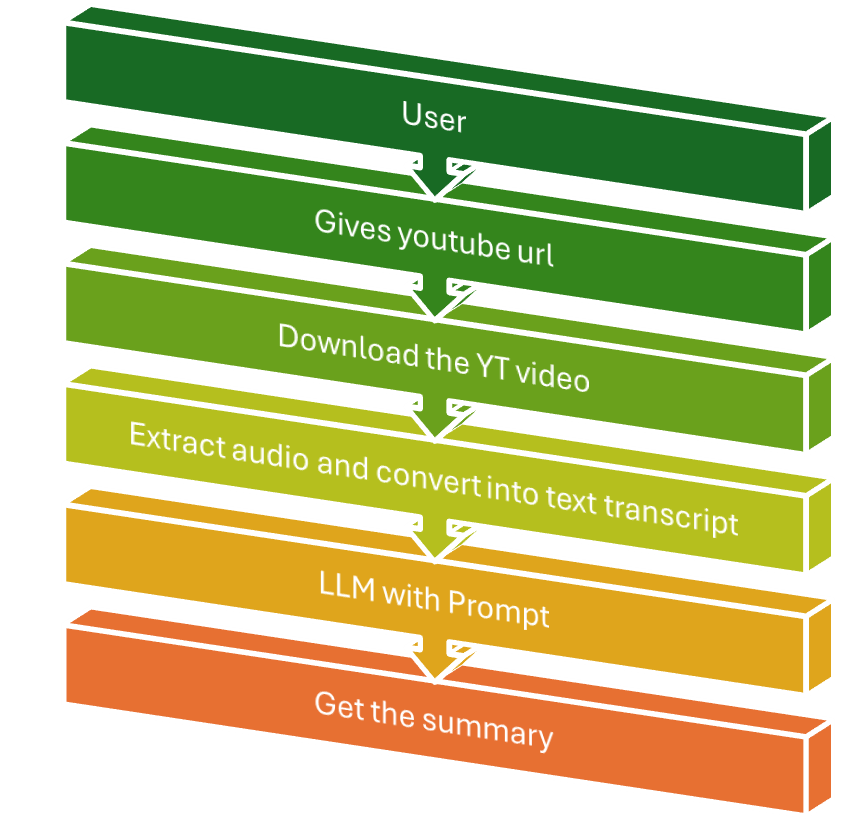

In [2]:
import warnings
warnings.filterwarnings("ignore")